In [1]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps

## mutation count annotations

In [ ]:
# load annotated data
naive_path = "/home/jovyan/shared/AbLM_training_data/HDfluJOY_SAHD_naive_AbLM.csv"
mem_path = "/home/jovyan/shared/AbLM_training_data/HDfluJOY_SAHD_memory_AbLM.csv"
naive = pd.read_csv(naive_path, low_memory=False)
memory = pd.read_csv(mem_path, low_memory=False)
all_annot = pd.concat([naive, memory], ignore_index=True)

# only south african donors
all_annot = all_annot[all_annot["is_SouthAfrican"] == True] 

/tmp/ipykernel_1298914/3598569894.py:4: DtypeWarning: Columns (45,98,99,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  naive = pd.read_csv(naive_path)
/tmp/ipykernel_1298914/3598569894.py:5: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  memory = pd.read_csv(mem_path)


In [3]:
# filter for relevant columns
# [col for col in all_annot.columns]
col_list = ['name', 'sample', 'timepoint', 'experiment', 'donor', 'cell_type', 
            'v_gene:0', 'd_gene:0', 'j_gene:0', 'junction_aa:0', 'cdr3_length:0', 'fr1_aa:0', 'cdr1_aa:0', 'fr2_aa:0', 'cdr2_aa:0', 'fr3_aa:0', 'cdr3_aa:0', 'fr4_aa:0', 
            'v_identity:0', 'v_identity_aa:0', 'v_mutations:0', 'v_mutations_aa:0', 'v_insertions:0', 'v_deletions:0', 'isotype:0', 'locus:0', 'sequence:0', 'sequence_aa:0',
            'v_gene:1', 'd_gene:1', 'j_gene:1', 'junction_aa:1', 'cdr3_length:1', 'fr1_aa:1', 'cdr1_aa:1', 'fr2_aa:1', 'cdr2_aa:1', 'fr3_aa:1', 'cdr3_aa:1', 'fr4_aa:1', 
            'v_identity:1', 'v_identity_aa:1', 'v_mutations:1', 'v_mutations_aa:1', 'v_insertions:1', 'v_deletions:1', 'isotype:1', 'locus:1', 'sequence:1', 'sequence_aa:1']
all_annot = all_annot[col_list]
all_annot

,name,sample,timepoint,experiment,donor,cell_type,v_gene:0,d_gene:0,j_gene:0,junction_aa:0,...,v_identity:1,v_identity_aa:1,v_mutations:1,v_mutations_aa:1,v_insertions:1,v_deletions:1,isotype:1,locus:1,sequence:1,sequence_aa:1
0,AAACCTGAGAATTGTG-1,SAHD_1,NaN,Sort1,212-30-0016-0,naive,IGHV1-69,IGHD3-9,IGHJ2,CARDRYDILTGYPRSFDLW,...,1.000000,1.000000,NaN,NaN,NaN,NaN,unknown,IGK,GACATCCAGATGACCCAGTCTCCATCCTCCCTGTCTGCATCTGTAG...,DIQMTQSPSSLSASVGDRVTITCQASQDISNYLNWYQQKPGKAPKL...
1,AAACCTGAGCCACTAT-1,SAHD_1,NaN,Sort1,212-30-0008-0,naive,IGHV3-30,IGHD3-10,IGHJ4,CARDFGDEAYFDYW,...,1.000000,1.000000,NaN,NaN,NaN,NaN,unknown,IGK,GAAATTGTGTTGACGCAGTCTCCAGGCACCCTGTCTTTGTCTCCAG...,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...
2,AAACCTGAGCTAGTGG-1,SAHD_1,NaN,Sort1,212-30-0013-0,naive,IGHV3-48,IGHD6-13,IGHJ4,CARDNNEWPAAALDFDYW,...,1.000000,1.000000,NaN,NaN,NaN,NaN,unknown,IGK,GCCATCCAGATGACCCAGTCTCCATCCTCCCTGTCTGCATCTGTAG...,AIQMTQSPSSLSASVGDRVTITCRASQGIRNDLGWYQQKPGKAPKL...
3,AAACCTGCAAAGTGCG-1,SAHD_1,NaN,Sort1,212-30-0003-0,naive,IGHV3-48,IGHD2-21,IGHJ4,CARGRIAIPFDYW,...,0.996528,1.000000,337:T>C,NaN,NaN,NaN,unknown,IGL,TCCTATGAGCTGACACAGCCACCCTCGGTGTCAGTGTCCCCAGGAC...,SYELTQPPSVSVSPGQTARITCSGDALPKQYAYWYQQKPGQAPVLV...
4,AAACCTGCACGTTGGC-1,SAHD_1,NaN,Sort1,212-30-0016-0,naive,IGHV4-61,IGHD3-3,IGHJ5,CAREYDFWSGNHNWFDPW,...,0.996516,1.000000,135:A>G,NaN,NaN,NaN,unknown,IGK,GAAATAGTGATGACGCAGTCTCCAGCCACCCTGTCTGTGTCTCCAG...,EIVMTQSPATLSVSPGERATLSCRASQSVSSNLAWYQQKPGQAPRL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506922,TTTGGTTAGCCCGAAA-1-1,SAHD_5,NaN,Sort2,212-30-0001-0,memory,IGHV4-61,IGHD3-22,IGHJ3,CARGPGYYYDIRTGVFDIW,...,0.968421,0.936842,83:G>C|110:G>A|113:A>G|135:A>G|197:C>A|198:C>G...,28:S>T|37:S>N|38:N>S|66:T>K|106:Q>H|107:Y>F,NaN,NaN,unknown,IGK,GAAATAGTGATGACGCAGTCTCCAGCCACCCTGTCTGTGTCTCCAG...,EIVMTQSPATLSVSPGERATLSCRASQTVSNSLAWYQQKPGQAPRL...
506923,TTTGGTTCATTCGACA-1,SAHD_5,NaN,Sort2,212-30-0001-0,memory,IGHV3-7,IGHD3-16,IGHJ6,CARDQTPLYDYVWGSYRYPYYYGMDVW,...,0.957143,0.935484,45:A>T|83:G>T|84:C>T|107:G>A|110:G>A|165:T>C|2...,28:S>I|36:S>N|37:S>N|88:T>I|99:F>Y|103:Y>F,NaN,NaN,unknown,IGK,GACATCCAGATGACCCAGTCTCCATCCTCCCTGTCTGCATCTGTTG...,DIQMTQSPSSLSASVGDRVTITCRASQIINNYLNWYQQKPGKAPKL...
506924,TTTGGTTGTCTAGAGG-1,SAHD_5,NaN,Sort2,212-30-0007-0,memory,IGHV2-70,IGHD5-5,IGHJ4,CARSSAGRGFTYGFLDSW,...,0.910394,0.849462,78:T>C|83:G>A|84:C>T|107:G>A|110:G>A|113:A>T|1...,28:S>N|36:S>N|37:S>N|38:Y>F|40:N>S|65:S>N|68:Q...,NaN,NaN,unknown,IGK,GACATCCAGATGACCCAGTCTCCATCCTCCCTGTCTGCATCTGTAG...,DIQMTQSPSSLSASVGDRVTITCRASQNINNFLSWYQQKPGKAPKL...
506925,TTTGTCAGTTTGTTTC-1-1,SAHD_5,NaN,Sort2,212-30-0009-0,memory,IGHV3-23,IGHD6-13,IGHJ4,CAKDFKERRIAAAALFDFW,...,0.972603,0.979381,87:T>C|103:G>A|104:G>A|111:C>T|126:C>T|132:G>A...,35:G>N|66:K>E,NaN,NaN,unknown,IGL,CAGTCTGCCCTGACTCAGCCTCGCTCAGTGTCCGGGTCTCCTGGAC...,QSALTQPRSVSGSPGQSVTISCTGTSSDVGNYNYVSWYQQHPGKAP...


In [4]:
# count mutations on each chain
h = all_annot.loc[:, ["name", "sequence_aa:0", "v_identity_aa:0", "v_mutations_aa:0", "locus:0"]]
h.columns = h.columns.str.replace(':0', '', regex=False)

l = all_annot.loc[:, ["name", "sequence_aa:1", "v_identity_aa:1", "v_mutations_aa:1", "locus:1"]]
l.columns = h.columns.str.replace(':0', '', regex=False)

all_annot = pd.concat([h, l], ignore_index=True)

counts = []
for row in all_annot["v_mutations_aa"]:
    if isinstance(row, str):
        counts.append(row.count(":"))
    else:
        counts.append(0)

all_annot["v_mutation_count_aa"] = pd.Series(counts, name="v_mutation_count_aa")
all_annot.rename(columns={"name":"sequence_id"}, inplace=True)
all_annot

,sequence_id,sequence_aa,v_identity_aa,v_mutations_aa,locus,v_mutation_count_aa
0,AAACCTGAGAATTGTG-1,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...,1.000000,NaN,IGH,0
1,AAACCTGAGCCACTAT-1,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSYAMHWVRQAPGKGLE...,1.000000,NaN,IGH,0
2,AAACCTGAGCTAGTGG-1,EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYEMNWVRQAPGKGLE...,1.000000,NaN,IGH,0
3,AAACCTGCAAAGTGCG-1,EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYEMNWVRQAPGKGLE...,1.000000,NaN,IGH,0
4,AAACCTGCACGTTGGC-1,QVQLQESGPGLVKPSQTLSLTCTVSGGSISSGSYYWSWIRQPAGKG...,0.989899,64:S>D,IGH,1
...,...,...,...,...,...,...
327615,TTTGGTTAGCCCGAAA-1-1,EIVMTQSPATLSVSPGERATLSCRASQTVSNSLAWYQQKPGQAPRL...,0.936842,28:S>T|37:S>N|38:N>S|66:T>K|106:Q>H|107:Y>F,IGK,6
327616,TTTGGTTCATTCGACA-1,DIQMTQSPSSLSASVGDRVTITCRASQIINNYLNWYQQKPGKAPKL...,0.935484,28:S>I|36:S>N|37:S>N|88:T>I|99:F>Y|103:Y>F,IGK,6
327617,TTTGGTTGTCTAGAGG-1,DIQMTQSPSSLSASVGDRVTITCRASQNINNFLSWYQQKPGKAPKL...,0.849462,28:S>N|36:S>N|37:S>N|38:Y>F|40:N>S|65:S>N|68:Q...,IGK,14
327618,TTTGTCAGTTTGTTTC-1-1,QSALTQPRSVSGSPGQSVTISCTGTSSDVGNYNYVSWYQQHPGKAP...,0.979381,35:G>N|66:K>E,IGL,2


## shuffled pairs dataset

In [5]:
path = "/home/jovyan/shared/mahdi/1_projects/model_optimization/08paired_classification/data/SA_donors_stuff/all_combined.csv"
df = pd.read_csv(path)

In [6]:
# separate ids for each chain in shuffled dataset 
df["h_id"] = df["name"].apply(lambda name: name.split("|")[0])
df["l_id"] = df["name"].apply(lambda name: name.split("|")[1])

## combine mutation counts and shuffled pairs dataset

In [7]:
# to add mutation counts
heavy_all = all_annot[all_annot["locus"] == "IGH"]
light_all = all_annot[all_annot["locus"] != "IGH"]

heavy = df.loc[:, ["name", "h_id", "h_sequence", "label"]].rename(columns={"h_id": "sequence_id", "h_sequence": "sequence_aa"})
heavy = heavy.merge(heavy_all, on=["sequence_id", "sequence_aa"])
heavy = heavy.drop(columns=["v_identity_aa", "v_mutations_aa", "locus"]).rename(columns={"sequence_id":"h_id", "sequence_aa":"h_sequence", "v_mutation_count_aa":"h_mutation_count"})

light = df.loc[:, ["name", "l_id", "l_sequence", "label"]].rename(columns={"l_id": "sequence_id", "l_sequence": "sequence_aa"})
light = light.merge(light_all, on=["sequence_id", "sequence_aa"])
light = light.drop(columns=["v_identity_aa", "v_mutations_aa", "locus"]).rename(columns={"sequence_id":"l_id", "sequence_aa":"l_sequence", "v_mutation_count_aa":"l_mutation_count"})

data_mut = heavy.merge(light, on=["name", "label"]).loc[:, ["name", "label", "h_sequence", "h_mutation_count", "l_sequence", "l_mutation_count"]]
data_mut

,name,label,h_sequence,h_mutation_count,l_sequence,l_mutation_count
0,GACCTGGTCACGCATA-1|GACCTGGTCACGCATA-1,0,EVQLMESGGGLVQPGGSLRLSCAASGFTFSRFWMHWVRQAPGKGLV...,7,QSALTQPASVSGSPGQSITISCTGTSRDVGAYKYVSWYQQHPGKAP...,10
1,TCGAGGCTCAGCACAT-1|TCGAGGCTCAGCACAT-1,0,QVQLQESGPGLVKPSQTLSLTCTVSGGSISSGDYYWSWIRQPPGKG...,0,AIRMTQSPSSFSASTGDRVTITCRASQGISSYLAWYQQKPGKAPKL...,0
2,TCGAGGCTCAGCACAT-1|AGACGTTGTACCGGCT-1-1,1,QVQLQESGPGLVKPSQTLSLTCTVSGGSISSGDYYWSWIRQPPGKG...,0,EIVLTQSPGTLSLSPGERATLSCKTSQSLRSSYLAWYQQKPGQAPR...,7
3,GGACGTCAGCCAGGAT-1|GGACGTCAGCCAGGAT-1,0,EVQLVESGGGLVQPGGSLRLSCAASGFTVSSNYMTWVRQAPGKGLE...,1,QSVLTQPPSASGTPGQRVTISCSGSSSNIGSNTVNWYQQLPGTAPK...,0
4,TAAGCGTTCGGATGTT-1|TAAGCGTTCGGATGTT-1,0,QVQLQESGPGLVKPSETLSLTCTVSGGSISSYYWSWIRQPPGKGLE...,0,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,0
...,...,...,...,...,...,...
93057,TTGACTTCATGGTAGG-1|CAGCAGCTCCTCAATT-1,1,GVQLVESGGGLIQPGGSLRLSCAASGFTVSGNYMSWVRQAPGRGLE...,10,DIQLTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...,0
93058,TTGCGTCGTCGAGTTT-1|ATTACTCAGCAGGCTA-1,1,GVQLVESGGDLVEPGGSLRLSCAGSGFSFSDAWMSWVRQAPGKGLE...,11,QSALTQPRSVSGSPGQSVTISCTGTSSDFGGYDYVSWYQHHPGKAP...,9
93059,TTGTAGGTCAACTCTT-1-1|GATCGATGTAACGCGA-1-2,1,QLQLQESGPGLVKPSETLSLTCTVSGDSISSSNYYWGWIRQPPGKG...,6,ETVVTQEPSFSVSPGGTVTLTCGLTSGSVSTTYYPSWYQQTPGQAP...,10
93060,TTTATGCTCGCGTAGC-1|GGCAATTCACCTGGTG-1-1,1,EVQLVESGGGLVKPGGSLRLSCAASGFTFSSYSMNWVRQAPGKGLE...,0,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...,0


## process data by mutation counts

In [8]:
model_order = [
    "8M-Q", "35M-Q", "150M-Q", "350M-Q", "650M-Q", 
    "8M-H", "35M-H", "150M-H", "350M-H", "650M-H",
    "8M-F", "35M-F", "150M-F", "350M-F", "650M-F"
]

# list to load test data with predictions
pair_preds = [f"/home/jovyan/shared/mahdi/1_projects/model_optimization/08paired_classification/SA_donors_ANALYSIS/KN_analysis/results/all_predictions_itr{i}.csv" for i in range(5)]
pair_preds

['/home/jovyan/shared/mahdi/1_projects/model_optimization/08paired_classification/SA_donors_ANALYSIS/KN_analysis/results/all_predictions_itr0.csv',
 '/home/jovyan/shared/mahdi/1_projects/model_optimization/08paired_classification/SA_donors_ANALYSIS/KN_analysis/results/all_predictions_itr1.csv',
 '/home/jovyan/shared/mahdi/1_projects/model_optimization/08paired_classification/SA_donors_ANALYSIS/KN_analysis/results/all_predictions_itr2.csv',
 '/home/jovyan/shared/mahdi/1_projects/model_optimization/08paired_classification/SA_donors_ANALYSIS/KN_analysis/results/all_predictions_itr3.csv',
 '/home/jovyan/shared/mahdi/1_projects/model_optimization/08paired_classification/SA_donors_ANALYSIS/KN_analysis/results/all_predictions_itr4.csv']

In [9]:
# for each iteration, find the predictive accuracies separated by types of chain pairings
pairs_types_accs = []
for itr in range(len(pair_preds)):

    # load data and merge with mutation counts
    all_annot = pd.read_csv(pair_preds[itr])
    all_annot = all_annot.merge(data_mut, on=["name", "label", "h_sequence", "l_sequence"], how="left")

    # different splits of the test dataset based on the mutation count of the chain pairs (both classes)
    germline = all_annot[(all_annot["h_mutation_count"] == 0) & (all_annot["l_mutation_count"] == 0)]
    mutated = all_annot[(all_annot["h_mutation_count"] != 0) & (all_annot["l_mutation_count"] != 0)]
    h_germ = all_annot[(all_annot["h_mutation_count"] == 0) & (all_annot["l_mutation_count"] != 0)]
    l_germ = all_annot[(all_annot["h_mutation_count"] != 0) & (all_annot["l_mutation_count"] == 0)]

    sames = all_annot[((all_annot["h_mutation_count"] == 0) & (all_annot["l_mutation_count"] == 0)) |
                      ((all_annot["h_mutation_count"] != 0) & (all_annot["l_mutation_count"] != 0))]
    diffs = all_annot[((all_annot["h_mutation_count"] != 0) & (all_annot["l_mutation_count"] == 0)) |
                      ((all_annot["h_mutation_count"] == 0) & (all_annot["l_mutation_count"] != 0))]

    datasets = {
        "Unmutated": germline,
        "Mutated": mutated,
        "Different": diffs,
        "All": all_annot,
    }

    # calculate stats per sequence type
    for model in model_order:
        for name, pair_df in datasets.items():
            # prediction accuracy
            cm = pd.crosstab(pair_df["label"], pair_df[f"{model}_prediction"])
            pair_acc = np.diag(cm).sum() / cm.to_numpy().sum()
            
            # mean probability towards CORRECT class
            correct_probs = pair_df.apply(lambda p: p[f"{model}_probability"] if (p["label"] == 1) else (1 - p[f"{model}_probability"]), axis=1)
            
            pairs_types_accs.append({
                "itr": itr,
                "model": model,
                "pair_type": name,
                "acc": pair_acc,
                "correct_probability": correct_probs.mean()
            })

pair_accs_df = pd.DataFrame(pairs_types_accs)
pair_accs_df.groupby(["pair_type", "model"]).mean()

itr       acc  correct_probability
pair_type model                                     
All       150M-F  2.0  0.669572             0.581613
          150M-H  2.0  0.669964             0.576769
          150M-Q  2.0  0.666469             0.570558
          350M-F  2.0  0.704652             0.618209
          350M-H  2.0  0.677389             0.587293
          350M-Q  2.0  0.653515             0.564089
          35M-F   2.0  0.683278             0.582610
          35M-H   2.0  0.665124             0.572144
          35M-Q   2.0  0.666374             0.567810
          650M-F  2.0  0.691508             0.604659
          650M-H  2.0  0.642648             0.563267
          650M-Q  2.0  0.616858             0.544066
          8M-F    2.0  0.657265             0.568311
          8M-H    2.0  0.647934             0.558343
          8M-Q    2.0  0.654013             0.563233
Different 150M-F  2.0  0.799636             0.671142
          150M-H  2.0  0.794579             0.657578
          150M-Q  2.0  0.799768             0.652149
          350M-F  2.0  0.823784             0.730544
          350M-H  2.0  0.789920             0.669446
          350M-Q  2.0  0.766266             0.625852
          35M-F   2.0  0.791959             0.664538
          35M-H   2.0  0.773955             0.649711
          35M-Q   2.0  0.791307             0.646789
          650M-F  2.0  0.817984             0.713261
          650M-H  2.0  0.753620             0.617002
          650M-Q  2.0  0.689069             0.566406
          8M-F    2.0  0.764913             0.638687
          8M-H    2.0  0.807627             0.631005
          8M-Q    2.0  0.791800             0.635326
Mutated   150M-F  2.0  0.590678             0.539933
          150M-H  2.0  0.596537             0.537368
          150M-Q  2.0  0.581556             0.529118
          350M-F  2.0  0.666672             0.589166
          350M-H  2.0  0.619128             0.555200
          350M-Q  2.0  0.571751             0.528048
          35M-F   2.0  0.635341             0.553563
          35M-H   2.0  0.599056             0.536569
          35M-Q   2.0  0.588874             0.529408
          650M-F  2.0  0.636010             0.569852
          650M-H  2.0  0.560324             0.530620
          650M-Q  2.0  0.540283             0.520046
          8M-F    2.0  0.584201             0.528210
          8M-H    2.0  0.523927             0.508742
          8M-Q    2.0  0.553508             0.517973
Unmutated 150M-F  2.0  0.641911             0.549308
          150M-H  2.0  0.641111             0.549435
          150M-Q  2.0  0.642280             0.544697
          350M-F  2.0  0.643324             0.553273
          350M-H  2.0  0.642846             0.551147
          350M-Q  2.0  0.643478             0.549415
          35M-F   2.0  0.641153             0.543461
          35M-H   2.0  0.641943             0.543559
          35M-Q   2.0  0.641550             0.540999
          650M-F  2.0  0.642283             0.548924
          650M-H  2.0  0.634786             0.551871
          650M-Q  2.0  0.635804             0.550274
          8M-F    2.0  0.642341             0.550571
          8M-H    2.0  0.642311             0.548640
          8M-Q    2.0  0.642372             0.549458

## plot overall accuracy

In [10]:
all_df = pair_accs_df[pair_accs_df['pair_type'] == 'All'].copy()

In [11]:
# extract model / dataset name
all_df[["model", "datasets"]] = all_df["model"].str.split("-", 1, expand=True)

/tmp/ipykernel_1298914/289335295.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  all_df[["model", "datasets"]] = all_df["model"].str.split("-", 1, expand=True)


In [12]:
pallete = sns.color_palette("colorblind", n_colors=3)
palette_dict = {
    'F': pallete[0],
    'H': pallete[1],
    'Q': pallete[2]
}

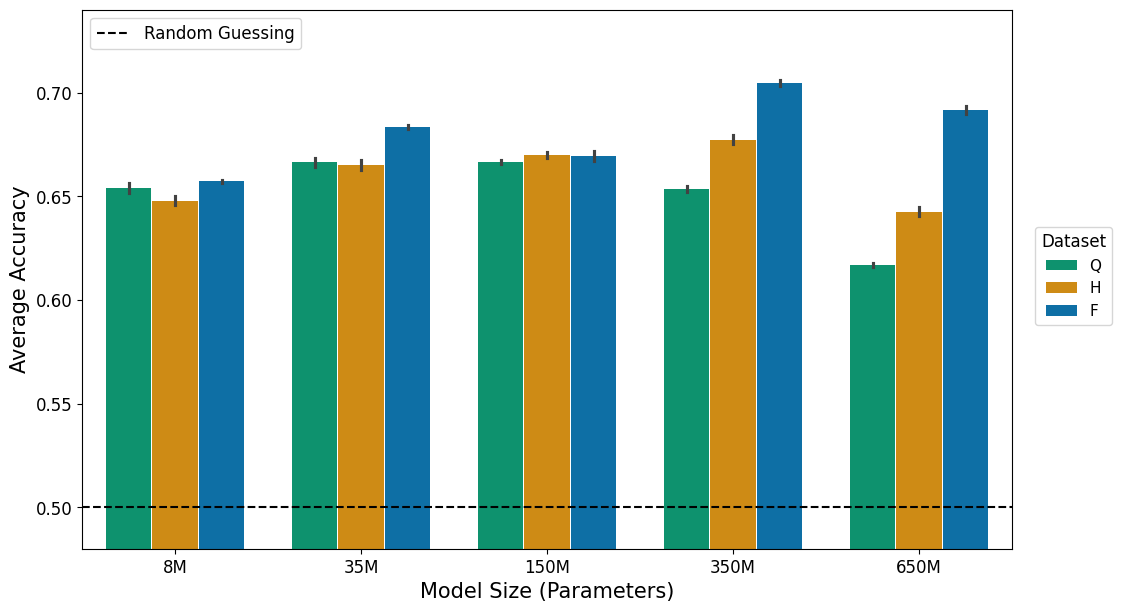

In [13]:
# accuracy barplot
fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(data=all_df,
            x="model", y="acc", 
            hue="datasets", 
            palette=palette_dict,
            errorbar="se",
            gap=0.025,
            width=0.75,
            saturation=0.85,
           )

# get legends
handles_ds, labels_ds = ax.get_legend_handles_labels()
ax.get_legend().set_visible(False)

# labels & params
ax.set_xlabel("Model Size (Parameters)", fontsize=15)
ax.set_ylabel("Average Accuracy", fontsize=15)
ax.xaxis.set_tick_params(labelsize = 12)
ax.yaxis.set_tick_params(labelsize = 12)

ax.set_ybound(0.48, 0.74)

# random guessing line
line = plt.axhline(y=0.5, color='black', linestyle='--', label='Random Guessing')
ax.legend(handles=[line], loc='upper left', fontsize=12)

# plot legend
fig.legend(handles_ds, labels_ds, 
           loc="center right", 
           title="Dataset",
           bbox_to_anchor=(0.99, 0.5),
           fontsize=11, title_fontsize=12,
           ncols=1)

# save
plt.savefig("./figures/avg_overall_accuracy.pdf", bbox_inches='tight', dpi=300)

## plot heatmaps
Accuracy for sequences with 15 or less mutations

In [14]:
def itr_col(path, itr):
    df = pd.read_csv(path)
    df["itr"] = itr
    return df

all_pair_preds = [itr_col(pair_preds[itr], itr) for itr in range(len(pair_preds))]
all_pair_preds = pd.concat(all_pair_preds, ignore_index=True) 
len(all_pair_preds)

94414

In [15]:
# filter out annotations to just be in the zoomed in area that we are interested in plotting
data_mut = data_mut[(data_mut["h_mutation_count"] <= 15) & (data_mut["l_mutation_count"] <= 15)]
len(data_mut)

86035

In [16]:
# merge with mutation counts (add mutation counts to inference data)
test_data = all_pair_preds.merge(data_mut, on=["name", "label", "h_sequence", "l_sequence"], how="inner")

# remove donor, logits, and category columns (for now so that the df is smaller, if i want to use these i can just not remove them)
test_data.drop([col_name for col_name in test_data.columns if any(keyword in col_name for keyword in ["donor", "category", "logits"])], axis=1, inplace=True)

# stats that cannot be calculated in a groupby object
for model in tqdm(model_order):
    # correct prediction counter column
    test_data[f"{model}_correct"] = test_data["label"] == test_data[f"{model}_prediction"]

    # prediction confidence towards the CORRECT label class
    test_data[f"{model}_confidence_towards_label"] = test_data.apply(lambda p: p[f"{model}_probability"] if (p["label"] == 1) else (1 - p[f"{model}_probability"]), axis=1)

test_data

  0%|          | 0/15 [00:00<?, ?it/s]

,name,h_sequence,l_sequence,label,8M-Q_prediction,8M-Q_probability,8M-H_prediction,8M-H_probability,8M-F_prediction,8M-F_probability,...,8M-F_correct,8M-F_confidence_towards_label,35M-F_correct,35M-F_confidence_towards_label,150M-F_correct,150M-F_confidence_towards_label,350M-F_correct,350M-F_confidence_towards_label,650M-F_correct,650M-F_confidence_towards_label
0,AACTCTTCAGAGCCAA-1|AACTCTTCAGAGCCAA-1,EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYSMNWVRQAPGKGLE...,EIVLTQSPGTLSLSPGERATLSCRASQSVSSSYLAWYQQKPGQAPR...,0,0,0.355892,0,0.361093,0,0.356251,...,True,0.643749,True,0.644283,True,0.647315,True,0.662862,True,0.605312
1,ACTGAGTGTTAGGGTG-1-1|TCATTTGTCAGTTCGA-1,EGQLLESGGGLVQPGGSLRLSCAASRFTFNNYAMSWVRQAPGKGLE...,DIQLTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...,1,1,0.715055,1,0.685835,1,0.537992,...,True,0.537992,True,0.725990,True,0.736168,True,0.879637,True,0.887018
2,TGAGAGGGTTACAGAA-1|TGAGAGGGTTACAGAA-1,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSSYAISWVRQAPGQGLE...,AIQLTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...,0,0,0.324156,0,0.347287,0,0.310345,...,True,0.689655,True,0.662989,True,0.684432,True,0.696497,True,0.676312
3,CAACCAACAATCCAAC-1-1|TTTGGTTCAGTTTACG-1,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSYGMHWVRQAPGKGLE...,EIVMTQTPLSSPVTLGQPASISCRSSQSLVHSDGDTYLSWLQQRPG...,1,1,0.844492,1,0.765599,1,0.895018,...,True,0.895018,True,0.907953,True,0.733218,True,0.991731,True,0.845769
4,ACGGGCTGTCAACTGT-1|GGTATTGGTAATCACC-1,EVQLVESGGGLVQPGRSLRLSCAASGFRFGDYSISWFRQAPGKGPE...,EIVLTQSPATLSLSPGERATLSCRASQSISNYLVWYQQKPGQAPRL...,1,0,0.432409,0,0.385527,0,0.344884,...,False,0.344884,False,0.267954,False,0.409810,False,0.291031,False,0.335691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86030,GCGGGTTTCTCTTGAT-1|GCGGGTTTCTCTTGAT-1,QVQLVESGGGVVQPGRSLRLSCAASGFTFSSYGMHWVRQAPGKGLE...,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...,0,0,0.325403,0,0.321133,0,0.318890,...,True,0.681110,True,0.650556,True,0.643912,True,0.673711,True,0.663378
86031,ACGATGTTCTGCCAGG-1|CAAGTTGTCGTAGGAG-1,QVHLVESGGGVVQPGRSLRLSCAASGFTFYNSVFHWVRQAPGKGLE...,QSVLTQPPSVSAAPGQKVTISCSGSSSNIGNNYVSWYQQLPGTAPK...,1,1,0.556512,1,0.575108,1,0.507294,...,True,0.507294,True,0.629039,True,0.577301,True,0.889542,True,0.649110
86032,TATCTCAAGACAAGCC-1|TATCTCAAGACAAGCC-1,QVQMVQSGAEVRKPGSSVKVSCKAPGGTFSSYAISWVRQAPGQGLE...,QSVLTQSPSVSAAPGQKVTISCSGSSSNIGNNYVSWYQQFPGTAPK...,0,1,0.713705,1,0.666528,1,0.633625,...,False,0.366375,False,0.392422,True,0.505132,False,0.449419,False,0.171344
86033,GGGACCTAGAAACCTA-1-1|CAGTAACTCGGAAACG-1,QITLKESGPTLVKPTQTLTLTCTFSGFSLSTSGVGVGWIRQPPGKA...,EIVMTQSLLSLPVTPGEPASISCRSSQSLLHSNGDNYLDWYLQKPG...,1,1,0.687827,1,0.797375,1,0.582777,...,True,0.582777,True,0.724487,True,0.654643,True,0.688856,True,0.637151


In [17]:
# colormaps for mutation plots
cmap_name = "RdBu"
cmap = colormaps[cmap_name]
cmap_r = colormaps[f"{cmap_name}_r"]

In [18]:
# aggregate inference stats
def agg_stats(grouped_df):
    d = {}
    # total counts
    counts = grouped_df["label"].count()
    d["count"] = grouped_df["label"].count()
    d["log_count"] = np.log(counts)
    d["native_count"] = counts - grouped_df["label"].sum()
    d["shuffled_count"] = grouped_df["label"].sum()

    # model-specific metrics
    for model in model_order:
        # accuracy
        d[f"{model}_acc"] = grouped_df[f"{model}_correct"].sum()/counts

        # prediction confidence towards CORRECT label (prob if shuffled label [1] , 1-prob if native label [0])
        d[f"{model}_confidence"] = grouped_df[f"{model}_confidence_towards_label"].mean()

        # prediction confidence towards shuffled label (probability)
        d[f"{model}_confidence_towards_shuffled"] = grouped_df[f"{model}_probability"].mean()
        
    return pd.Series(d)

In [19]:
# aggregate by mutation count
agg_all = test_data.groupby(["h_mutation_count", "l_mutation_count"]).apply(agg_stats).reset_index()

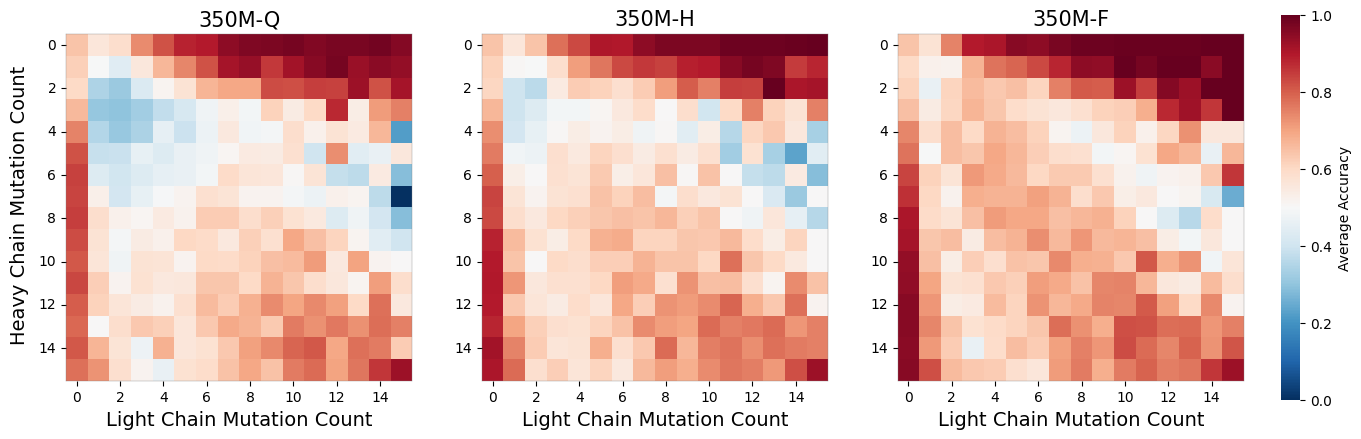

In [ ]:
cols_350 = ["h_mutation_count", "l_mutation_count"] + [col for col in agg_all.columns if '350M' in col]
models_350 = ["350M-Q", "350M-H", "350M-F"]

fig, axs = plt.subplots(1, 3, figsize=(16, 5))
mappable = None
for i, ax in enumerate(axs):
    model = models_350[i]

    heatmap = sns.heatmap(
        agg_all[cols_350].pivot(
            index="h_mutation_count", 
            columns="l_mutation_count", 
            values=f"{model}_acc",
        ),
        vmin=0, vmax=1,
        center=0.5, cmap=cmap_r,
        square=True,
        ax=ax,
        cbar=False
    )
    if mappable is None:
        mappable = heatmap.collections[0] 
    
    ax.set_xlabel("Light Chain Mutation Count", fontsize=14)
    ax.set_xticks(np.arange(0.5, 16, 2), 
                  list(range(0, 16, 2)),
                  rotation="horizontal", 
                  fontsize=10)
    
    ax.set_ylabel("") 
    ax.set_yticks(np.arange(0.5, 16, 2), 
                  list(range(0, 16, 2)),
                  rotation="horizontal", 
                  fontsize=10)
    
    ax.set_title(f"{model}", fontsize=15)

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.25)
        spine.set_color('grey')

# shared y axis
fig.text(0.09, 0.5, "Heavy Chain Mutation Count",
         va='center', rotation='vertical', fontsize=14)

# shared colorbar
cbar = fig.colorbar(mappable, ax=axs, orientation='vertical', fraction=0.02, pad=0.03, label="Average Accuracy")
cbar.ax.tick_params(labelsize=10)
cbar.outline.set_visible(False)

# save
plt.savefig("./figures/350M_mutation_counts_acc.pdf", bbox_inches='tight', dpi=300)

## plot boxenplot
Confidence towards correct class for sequences with 1 to 7 mutations 

In [21]:
test_subset = test_data[
    test_data["h_mutation_count"].between(1, 7) &
    test_data["l_mutation_count"].between(1, 7)
]

In [22]:
test_melt = test_subset.melt(
    value_vars=[f"{m}_confidence_towards_label" for m in models_350],
    var_name="model", value_name="confidence_towards_correct"
)
test_melt

,model,confidence_towards_correct
0,350M-Q_confidence_towards_label,0.395554
1,350M-Q_confidence_towards_label,0.367648
2,350M-Q_confidence_towards_label,0.572273
3,350M-Q_confidence_towards_label,0.416977
4,350M-Q_confidence_towards_label,0.359060
...,...,...
32758,350M-F_confidence_towards_label,0.685858
32759,350M-F_confidence_towards_label,0.606572
32760,350M-F_confidence_towards_label,0.472137
32761,350M-F_confidence_towards_label,0.586167


In [23]:
test_melt["dataset"] = test_melt["model"].str.split('-').str[1]
test_melt["model"] = test_melt["model"].str.split('-').str[0]

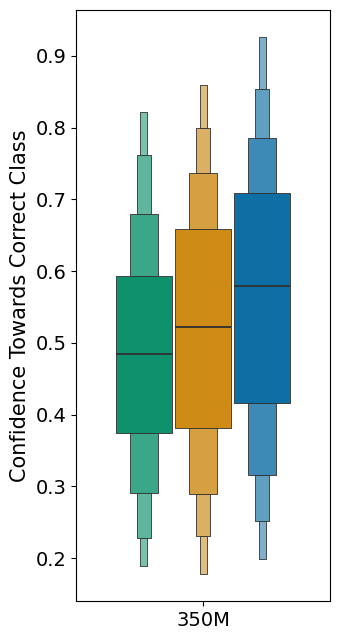

In [24]:
fig, ax = plt.subplots(figsize=(3.5, 6.5))
sns.boxenplot(
    data=test_melt,
    x="model", y="confidence_towards_correct",
    hue="dataset",
    palette=reversed(palette_dict.values()),
    showfliers=False,
    k_depth="proportion",
    outlier_prop=0.1,
    width=0.7,
    gap=0.05,
    saturation=0.85,
    linewidth=0.6,
    line_kws=dict(linewidth=1.3)
)

# hide legend
ax.get_legend().set_visible(False)

# labels & ticks
plt.xlabel("", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Confidence Towards Correct Class", fontsize=15)
plt.yticks(fontsize=14)

# save
plt.tight_layout()
plt.savefig("./figures/1-7-mutations_confidence.pdf", bbox_inches='tight', dpi=300)